In [1]:
import pandas as pd
import numpy as np
from io import BytesIO
import zipfile

In [2]:
zf = zipfile.ZipFile("names.zip", "r")  #----> Importing Zip file 
final_df = pd.DataFrame(columns = ['Name', 'Gender', 'Births', 'Year']) #---Creating new Dataframe with labels
for i in zf.infolist():  
    if(i.filename.endswith('txt')):
        year = i.filename[3:7]
        df = pd.read_csv(BytesIO(zf.read(i.filename)),names = ['Name','Gender', 'Births', 'Year'], encoding='utf-8', engine='python', header=None)
        df['Year'] = int(year)
        final_df = pd.concat([final_df, df])   #----> concatinating mutiple years files in one single in new df

In [3]:
final_df = final_df.reset_index(drop=True) #---- >  resetting the index of data frame

In [4]:
final_df

,Name,Gender,Births,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2052776,Zyeire,M,5,2021
2052777,Zyel,M,5,2021
2052778,Zyian,M,5,2021
2052779,Zylar,M,5,2021


Text(0, 0.5, 'Births 1.0 = 1 Million')

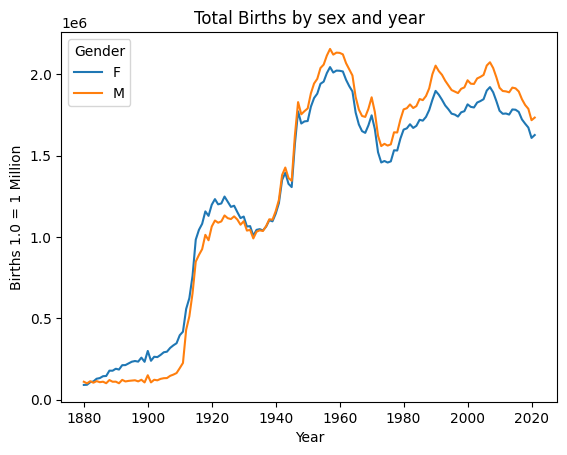

In [5]:
total_births = final_df.pivot_table('Births', index='Year', columns='Gender', aggfunc=sum)
ax = total_births.plot(title='Total Births by sex and year')
ax.set_ylabel("Births 1.0 = 1 Million")

In [9]:
sort_by_name = final_df.sort_values(['Births'], ascending = False)
sort_by_name

,Name,Gender,Births,Year
431064,Linda,F,99693,1947
441435,Linda,F,96212,1948
437168,James,M,94762,1947
544671,Michael,M,92723,1957
437169,Robert,M,91651,1947
...,...,...,...,...
1349751,Momoka,F,5,2000
1349750,Mollyann,F,5,2000
1349749,Molleigh,F,5,2000
1349748,Moises,F,5,2000


In [10]:
sort_by_name.head(100)

,Name,Gender,Births,Year
431064,Linda,F,99693,1947
441435,Linda,F,96212,1948
437168,James,M,94762,1947
544671,Michael,M,92723,1957
437169,Robert,M,91651,1947
...,...,...,...,...
478468,Michael,M,72800,1951
604219,James,M,72555,1962
579853,Robert,M,72349,1960
191062,Mary,F,72177,1922
